## 1. Random Walks

(a) 1차원 랜덤워크 모형을 시뮬레이션으로 구현하여라. 구체적으로 1차원 격자에서 왼쪽으로 움직일 확률이 1/2, 오른쪽으로 움직일 확률이 1/2로 가정하자. 그리고 $t$시간이 지난 후에 입자가 존재하는 위치를 구하는 코드를 작성하여라. 초기에 입자는 원점에 존재하며 매 타임스텝마다 1번씩 움직인다. (몬테카를로 시뮬레이션)


In [99]:
import random

def ran_walk(t):
    x=[0]
    element = [-1,1]
    for i in range(0,t+1):
        y=random.choice(element)
        x.append(x[i]+y)
    return x[t+1], x #마지막 입자의 위치와 시간에 따른 입자의 위치(위치 표본)

In [100]:
ran_walk(10)

(-5, [0, 1, 0, 1, 0, -1, -2, -3, -2, -3, -4, -5])

(b) 이러한 시행을 충분히 많이 시행하여서 $t$시간 후에 입자가 특정 위치에 존재하는 확률 분포를 구하여라. (파이썬 기초)

In [121]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 

def ran_walk2(t):
    x=[0]
    element = [-1,1]
    for i in range(0,t+1):
        y=random.choice(element)
        x.append(x[i]+y)
    return x

a= ran_walk2(1000)

C:\Users\chayr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chayr\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


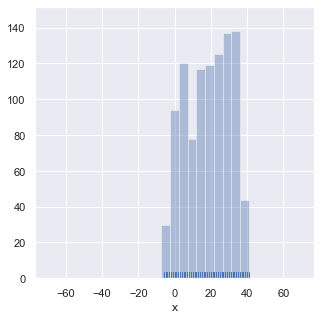

In [122]:
sns.distplot(a, rug=True, kde=False, bins=bins)
plt.xlabel("x")
plt.show()

In [127]:
mu = np.mean(a)
sigma = np.var(a)
std = np.std(a)

mu, sigma, np.std(a), np.median(a) # 평균값, 분산, 중간값, 표준편차

(18.501996007984033, 147.7849261556727, 12.15668236632317, 19.0)

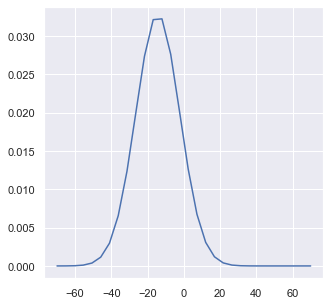

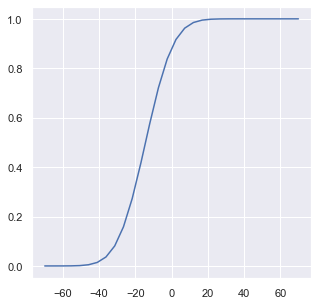

C:\Users\chayr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


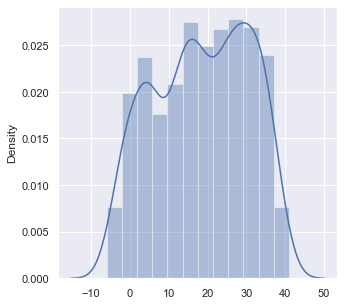

In [132]:
rv=sp.stats.norm(loc=mean,scale=std)#기댓값과 편차로 정규분포생성
pdf=rv.pdf(bins) #확률밀도함수 값 생성
plt.plot(bins,pdf)
plt.show()

#누적분포 함수 그리기
cdf=rv.cdf(bins)
plt.plot(bins,cdf)
plt.show()

sns.distplot(a);

## 2. Bifurcation

다음으로 주어지는 미분방정식이 있다.$$ \frac{dx}{dt}= rx-x^2. $$

(a) 이 방정식을 다음의 조건에서 풀고 궤적을 그려라. (미분방정식)

1) r=-1, x(0)=2
2) r=-1, x(0)=-2
3) r=1, x(0)=2
4) r=1, x(0)=-2


In [7]:
import numpy as np
import sympy
from sympy import Symbol
from sympy import * 

r = sympy.symbols("r")
t = symbols('t')
x = Function('x') # define x as a function of t
x(t)

x(t)

In [85]:
x(t).diff(t)

Eq(Derivative(x(t), t), -x(t)**2 + x(t))

In [59]:
## 1) r=-1, x(0)=2
r=-1
X=Eq(x(t).diff(t),r*x(t)-x(t)**2)
X

Eq(Derivative(x(t), t), -x(t)**2 - x(t))

In [60]:
dsolve(Eq(x(t).diff(t),r*x(t)-x(t)**2))

Eq(x(t), -C1/(C1 - exp(t)))

In [61]:
X1=dsolve(X,ics={x(0):2})
X1

Eq(x(t), -2/(3*(2/3 - exp(t))))

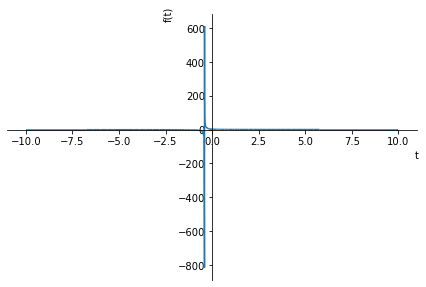

In [72]:
%matplotlib inline
plot(X1.rhs);

In [63]:
##2) r=-1, x(0)=-2
r=-1
X=Eq(x(t).diff(t),r*x(t)-x(t)**2)
dsolve(Eq(x(t).diff(t),r*x(t)-x(t)**2))
X2=dsolve(X,ics={x(0):-2})
X2

Eq(x(t), -2/(2 - exp(t)))

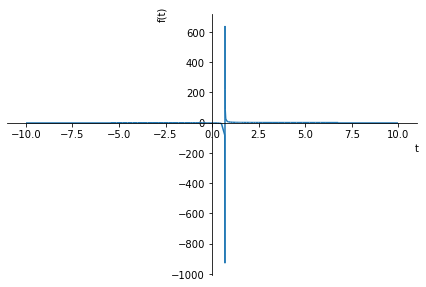

In [73]:
%matplotlib inline
plot(X2.rhs);

In [64]:
##3) r=1, x(0)=2
r=1
X=Eq(x(t).diff(t),r*x(t)-x(t)**2)
dsolve(Eq(x(t).diff(t),r*x(t)-x(t)**2))
X3=dsolve(X,ics={x(0):2})
X3

Eq(x(t), 1/(1 - exp(-t)/2))

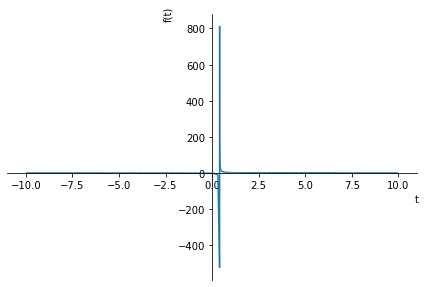

In [74]:
%matplotlib inline
plot(X3.rhs);

In [66]:
##4) r=1, x(0)=-2
r=1
X=Eq(x(t).diff(t),r*x(t)-x(t)**2)
dsolve(Eq(x(t).diff(t),r*x(t)-x(t)**2))
X4=dsolve(X,ics={x(0):-2})
X4

Eq(x(t), 1/(1 - 3*exp(-t)/2))

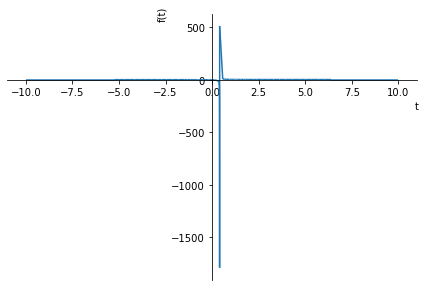

In [75]:
%matplotlib inline
plot(X4.rhs);

(b) 정상상태(dx/dt=0)에서 가능한 해를 구하여라. (방정식)
즉, 다음의 조건에서 파이썬을 이용하여 방정식을 풀어라.$$ 0= rx -x^2 = x( r-x) $$

1. r=-1

In [103]:
r = sympy.symbols("r")
t = symbols('t')
x = Function('x')
Y=Eq(0,r*x(t)-x(t)**2)
Y

Eq(0, r*x(t) - x(t)**2)

In [104]:
r = sympy.symbols("r")
t,x = symbols('t,x')

r=-1
Y1=r*x-x**2

sympy.solve(Y1)

[-1, 0]

2. r=1

In [105]:
r=1
Y2=r*x-x**2

sympy.solve(Y2)

[0, 1]